In [1]:
"""
import os
import re
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *

pd.set_option('display.max_columns', None)
"""

"\nimport os\nimport re\nimport sklearn\nimport numpy as np \nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nfrom collections import Counter\nfrom sklearn.metrics import *\nfrom sklearn.linear_model import *\nfrom sklearn.model_selection import *\n\npd.set_option('display.max_columns', None)\n"

In [2]:
# https://www.kaggle.com/theoviel/ncaa-starter-the-simpler-the-better
import os #ファイル、ディレクトリ操作
import re
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *

pd.set_option('display.max_columns', None)

In [3]:
"""
# DATA_PATH = '../input/ncaam-march-mania-2021/'
DATA_PATH = '../input/ncaaw-march-mania-2021/'
DATA_PATH_M = '../input/ncaam-march-mania-2021/'

for filename in os.listdir(DATA_PATH):
    print(filename)
"""

"\n# DATA_PATH = '../input/ncaam-march-mania-2021/'\nDATA_PATH = '../input/ncaaw-march-mania-2021/'\nDATA_PATH_M = '../input/ncaam-march-mania-2021/'\n\nfor filename in os.listdir(DATA_PATH):\n    print(filename)\n"

In [4]:
DATA_PATH = 'C:\\Users\\shota\\OneDrive\\ドキュメント\\Data\\Kaggle\\kc_NCAAW\\WDataFiles_Stage1\\'
DATA_PATH_M = 'C:\\Users\\shota\\OneDrive\\ドキュメント\\Data\\Kaggle\\kc_NCAAW\\WDataFiles_Stage1\\'

for filename in os.listdir(DATA_PATH):
    print(filename)

Cities.csv
Conferences.csv
WGameCities.csv
WNCAATourneyCompactResults.csv
WNCAATourneyDetailedResults.csv
WNCAATourneySeeds.csv
WNCAATourneySlots.csv
WRegularSeasonCompactResults.csv
WRegularSeasonDetailedResults.csv
WSampleSubmissionStage1.csv
WSeasons.csv
WTeamConferences.csv
WTeams.csv
WTeamSpellings.csv


In [5]:
"""
# df_seeds = pd.read_csv(DATA_PATH + "MNCAATourneySeeds.csv")
df_seeds = pd.read_csv(DATA_PATH + "WNCAATourneySeeds.csv")
df_seeds.head()

"""

'\n# df_seeds = pd.read_csv(DATA_PATH + "MNCAATourneySeeds.csv")\ndf_seeds = pd.read_csv(DATA_PATH + "WNCAATourneySeeds.csv")\ndf_seeds.head()\n\n'

In [6]:
df_seeds = pd.read_csv(DATA_PATH + "WNCAATourneySeeds.csv")
df_seeds.head()

,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


In [7]:
"""
# df_season_results = pd.read_csv(DATA_PATH + "MRegularSeasonCompactResults.csv")
df_season_results = pd.read_csv(DATA_PATH + "WRegularSeasonCompactResults.csv")
df_season_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)
"""

'\n# df_season_results = pd.read_csv(DATA_PATH + "MRegularSeasonCompactResults.csv")\ndf_season_results = pd.read_csv(DATA_PATH + "WRegularSeasonCompactResults.csv")\ndf_season_results.drop([\'NumOT\', \'WLoc\'], axis=1, inplace=True)\n'

In [8]:
df_season_results = pd.read_csv(DATA_PATH + "WRegularSeasonCompactResults.csv")
df_season_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [9]:
"""
df_season_results['ScoreGap'] = df_season_results['WScore'] - df_season_results['LScore']
"""

"\ndf_season_results['ScoreGap'] = df_season_results['WScore'] - df_season_results['LScore']\n"

In [10]:
df_season_results['ScoreGap'] = df_season_results['WScore'] - df_season_results['LScore']

In [11]:
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,ScoreGap
0,1998,18,3104,91,3202,41,50
1,1998,18,3163,87,3221,76,11
2,1998,18,3222,66,3261,59,7
3,1998,18,3307,69,3365,62,7
4,1998,18,3349,115,3411,35,80


In [12]:
"""
#Features
For each team at each season, I compute :

Number of wins
Number of losses
Average score gap of wins
Average score gap of losses
And use the following features :

Win Ratio
Average score gap
"""

'\n#Features\nFor each team at each season, I compute :\n\nNumber of wins\nNumber of losses\nAverage score gap of wins\nAverage score gap of losses\nAnd use the following features :\n\nWin Ratio\nAverage score gap\n'

In [13]:
"""
num_win = df_season_results.groupby(['Season', 'WTeamID']).count()
num_win = num_win.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})
"""

'\nnum_win = df_season_results.groupby([\'Season\', \'WTeamID\']).count()\nnum_win = num_win.reset_index()[[\'Season\', \'WTeamID\', \'DayNum\']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})\n'

In [14]:
num_win = df_season_results.groupby(['Season', 'WTeamID']).count()
num_win = num_win.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})

In [15]:
"""
num_loss = df_season_results.groupby(['Season', 'LTeamID']).count()
num_loss = num_loss.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLosses", "LTeamID": "TeamID"})
"""

'\nnum_loss = df_season_results.groupby([\'Season\', \'LTeamID\']).count()\nnum_loss = num_loss.reset_index()[[\'Season\', \'LTeamID\', \'DayNum\']].rename(columns={"DayNum": "NumLosses", "LTeamID": "TeamID"})\n'

In [16]:
num_loss = df_season_results.groupby(['Season', 'LTeamID']).count()
num_loss = num_loss.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLosses", "LTeamID":"TeamID"})

In [17]:
"""
gap_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
gap_win = gap_win[['Season', 'WTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapWins", "WTeamID": "TeamID"})
"""

'\ngap_win = df_season_results.groupby([\'Season\', \'WTeamID\']).mean().reset_index()\ngap_win = gap_win[[\'Season\', \'WTeamID\', \'ScoreGap\']].rename(columns={"ScoreGap": "GapWins", "WTeamID": "TeamID"})\n'

In [18]:
gap_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
gap_win = gap_win[['Season', 'WTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapWins", "WTeamID": "TeamID"})

In [19]:
"""
gap_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
gap_loss = gap_loss[['Season', 'LTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapLosses", "LTeamID": "TeamID"})
"""

'\ngap_loss = df_season_results.groupby([\'Season\', \'LTeamID\']).mean().reset_index()\ngap_loss = gap_loss[[\'Season\', \'LTeamID\', \'ScoreGap\']].rename(columns={"ScoreGap": "GapLosses", "LTeamID": "TeamID"})\n'

In [20]:
gap_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
gap_loss = gap_loss[['Season', 'LTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapLosses", "LTeamID": "TeamID"})

In [21]:
gap_loss

,Season,TeamID,GapLosses
0,1998,3102,27.850000
1,1998,3103,18.611111
2,1998,3104,5.666667
3,1998,3106,14.466667
4,1998,3108,16.636364
...,...,...,...
7688,2020,3463,12.875000
7689,2020,3464,17.117647
7690,2020,3465,12.933333
7691,2020,3466,7.555556


In [22]:
"""
df_features_season_w = df_season_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_l = df_season_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})
"""

'\ndf_features_season_w = df_season_results.groupby([\'Season\', \'WTeamID\']).count().reset_index()[[\'Season\', \'WTeamID\']].rename(columns={"WTeamID": "TeamID"})\ndf_features_season_l = df_season_results.groupby([\'Season\', \'LTeamID\']).count().reset_index()[[\'Season\', \'LTeamID\']].rename(columns={"LTeamID": "TeamID"})\n'

In [23]:
#Merge
df_features_season_w = df_season_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_l = df_season_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

In [24]:
df_season_results.groupby(['Season', 'WTeamID']).count()

DayNum  WScore  LTeamID  LScore  ScoreGap
Season WTeamID                                           
1998   3102          4       4        4       4         4
       3103         11      11       11      11        11
       3104         21      21       21      21        21
       3106          6       6        6       6         6
       3108         12      12       12      12        12
...                ...     ...      ...     ...       ...
2020   3463         19      19       19      19        19
       3464         11      11       11      11        11
       3465         13      13       13      13        13
       3466         19      19       19      19        19
       3467         18      18       18      18        18

[7688 rows x 5 columns]

In [25]:
df_features_season_w

,Season,TeamID
0,1998,3102
1,1998,3103
2,1998,3104
3,1998,3106
4,1998,3108
...,...,...
7683,2020,3463
7684,2020,3464
7685,2020,3465
7686,2020,3466


In [26]:
"""
df_features_season = pd.concat([df_features_season_w, df_features_season_l], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)
"""

"\ndf_features_season = pd.concat([df_features_season_w, df_features_season_l], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)\n"

In [27]:
df_features_season = pd.concat([df_features_season_w, df_features_season_l], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)

In [28]:
"""
df_features_season = df_features_season.merge(num_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(num_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_loss, on=['Season', 'TeamID'], how='left')
"""

"\ndf_features_season = df_features_season.merge(num_win, on=['Season', 'TeamID'], how='left')\ndf_features_season = df_features_season.merge(num_loss, on=['Season', 'TeamID'], how='left')\ndf_features_season = df_features_season.merge(gap_win, on=['Season', 'TeamID'], how='left')\ndf_features_season = df_features_season.merge(gap_loss, on=['Season', 'TeamID'], how='left')\n"

In [29]:
df_features_season = df_features_season.merge(num_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(num_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_loss, on=['Season', 'TeamID'], how='left')

In [30]:
df_features_season.fillna(0, inplace=True)

In [31]:
"""
df_features_season['WinRatio'] = df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses'])
df_features_season['GapAvg'] = (
    (df_features_season['NumWins'] * df_features_season['GapWins'] - 
    df_features_season['NumLosses'] * df_features_season['GapLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)
"""

"\ndf_features_season['WinRatio'] = df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses'])\ndf_features_season['GapAvg'] = (\n    (df_features_season['NumWins'] * df_features_season['GapWins'] - \n    df_features_season['NumLosses'] * df_features_season['GapLosses'])\n    / (df_features_season['NumWins'] + df_features_season['NumLosses'])\n)\n"

In [32]:
#Compute features
df_features_season['WinRatio'] = df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses'])
df_features_season['GapAvg'] = (
    (df_features_season['NumWins'] * df_features_season['GapWins'] -
    df_features_season['NumLosses'] * df_features_season['GapLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

In [33]:
"""
df_features_season.drop(['NumWins', 'NumLosses', 'GapWins', 'GapLosses'], axis=1, inplace=True)
"""

"\ndf_features_season.drop(['NumWins', 'NumLosses', 'GapWins', 'GapLosses'], axis=1, inplace=True)\n"

In [34]:
df_features_season.drop(['NumWins', 'NumLosses', 'GapWins', 'GapLosses'], axis=1, inplace=True)

In [35]:
df_features_season

,Season,TeamID,WinRatio,GapAvg
0,1998,3102,0.166667,-20.625000
1,1998,3103,0.379310,-5.862069
2,1998,3104,0.700000,13.433333
3,1998,3106,0.285714,-7.952381
4,1998,3108,0.521739,1.304348
...,...,...,...,...
7701,2020,3463,0.703704,6.777778
7702,2020,3464,0.392857,-6.000000
7703,2020,3465,0.464286,-1.857143
7704,2020,3466,0.678571,10.142857


In [36]:
"""
# df_tourney_results = pd.read_csv(DATA_PATH + "MNCAATourneyCompactResults.csv")
df_tourney_results = pd.read_csv(DATA_PATH + "WNCAATourneyCompactResults.csv")
df_tourney_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)
"""

'\n# df_tourney_results = pd.read_csv(DATA_PATH + "MNCAATourneyCompactResults.csv")\ndf_tourney_results = pd.read_csv(DATA_PATH + "WNCAATourneyCompactResults.csv")\ndf_tourney_results.drop([\'NumOT\', \'WLoc\'], axis=1, inplace=True)\n'

In [37]:
#Tourney results
df_tourney_results = pd.read_csv(DATA_PATH + "WNCAATourneyCompactResults.csv")
df_tourney_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [38]:
"""
def get_round(day):
#     round_dic = {134: 0, 135: 0, 136: 1, 137: 1, 138: 2, 139: 2, 143: 3, 144: 3, 145: 4, 146: 4, 152: 5, 154: 6}
    round_dic = {137: 0, 138: 0, 139: 1, 140: 1, 141: 2, 144: 3, 145: 3, 146: 4, 147: 4, 148: 4, 151:5, 153: 5, 155: 6} # probably wrong but I don't use it anyways
    try:
        return round_dic[day]
    except:
        print(f'Unknow day : {day}')
        return 0
"""

"\ndef get_round(day):\n#     round_dic = {134: 0, 135: 0, 136: 1, 137: 1, 138: 2, 139: 2, 143: 3, 144: 3, 145: 4, 146: 4, 152: 5, 154: 6}\n    round_dic = {137: 0, 138: 0, 139: 1, 140: 1, 141: 2, 144: 3, 145: 3, 146: 4, 147: 4, 148: 4, 151:5, 153: 5, 155: 6} # probably wrong but I don't use it anyways\n    try:\n        return round_dic[day]\n    except:\n        print(f'Unknow day : {day}')\n        return 0\n"

In [39]:
def get_round(day):
#     round_dic = {134: 0, 135: 0, 136: 1, 137: 1, 138: 2, 139: 2, 143: 3, 144: 3, 145: 4, 146: 4, 152: 5, 154: 6}
    round_dic = {137: 0, 138: 0, 139: 1, 140: 1, 141: 2, 144: 3, 145: 3, 146: 4, 147: 4, 148: 4, 151:5, 153: 5, 155: 6} # probably wrong but I don't use it anyways
    try:
        return round_dic[day]
    except:
        print(f'Unknow day : {day}')
        return 0

In [40]:
"""
df_tourney_results['Round'] = df_tourney_results['DayNum'].apply(get_round)
"""

"\ndf_tourney_results['Round'] = df_tourney_results['DayNum'].apply(get_round)\n"

In [41]:
df_tourney_results['Round'] = df_tourney_results['DayNum'].apply(get_round)

In [42]:
df_tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Round
0,1998,137,3104,94,3422,46,0
1,1998,137,3112,75,3365,63,0
2,1998,137,3163,93,3193,52,0
3,1998,137,3198,59,3266,45,0
4,1998,137,3203,74,3208,72,0


In [43]:
#Ratings

In [44]:
"""
# df_massey = pd.read_csv(DATA_PATH_M + "MMasseyOrdinals.csv")
# df_massey = df_massey[df_massey['RankingDayNum'] == 133].drop('RankingDayNum', axis=1).reset_index(drop=True) # use first day of the tournament
"""

'\n# df_massey = pd.read_csv(DATA_PATH_M + "MMasseyOrdinals.csv")\n# df_massey = df_massey[df_massey[\'RankingDayNum\'] == 133].drop(\'RankingDayNum\', axis=1).reset_index(drop=True) # use first day of the tournament\n'

In [46]:
#Feature Engineering

In [47]:
"""
df = df_tourney_results.copy()
df = df[df['Season'] >= 2003].reset_index(drop=True)

df.head()
"""

"\ndf = df_tourney_results.copy()\ndf = df[df['Season'] >= 2003].reset_index(drop=True)\n\ndf.head()\n"

In [48]:
# train data
df = df_tourney_results.copy()
df = df[df['Season'] >= 2003].reset_index(drop=True)

df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Round
0,2003,138,3130,73,3330,72,0
1,2003,138,3160,84,3140,45,0
2,2003,138,3208,80,3150,61,0
3,2003,138,3261,86,3402,50,0
4,2003,138,3278,68,3408,48,0


In [49]:
"""
df = pd.merge(
    df, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'WTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})
"""

"\ndf = pd.merge(\n    df, \n    df_seeds, \n    how='left', \n    left_on=['Season', 'WTeamID'], \n    right_on=['Season', 'TeamID']\n).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})\n"

In [50]:
df = pd.merge(
    df, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'WTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})

In [51]:
"""
df = pd.merge(
    df, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'LTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})
"""

"\ndf = pd.merge(\n    df, \n    df_seeds, \n    how='left', \n    left_on=['Season', 'LTeamID'], \n    right_on=['Season', 'TeamID']\n).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})\n"

In [52]:
df = pd.merge(
    df,
    df_seeds,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})

In [53]:
"""
def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))
"""

'\ndef treat_seed(seed):\n    return int(re.sub("[^0-9]", "", seed))\n'

In [54]:
def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))    #正規表現で置換: re.sub, re.subn

In [55]:
"""
df['SeedW'] = df['SeedW'].apply(treat_seed)
df['SeedL'] = df['SeedL'].apply(treat_seed)
"""

"\ndf['SeedW'] = df['SeedW'].apply(treat_seed)\ndf['SeedL'] = df['SeedL'].apply(treat_seed)\n"

In [56]:
df['SeedW'] = df['SeedW'].apply(treat_seed)
df['SeedL'] = df['SeedL'].apply(treat_seed)

In [57]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Round,SeedW,SeedL
0,2003,138,3130,73,3330,72,0,5,12
1,2003,138,3160,84,3140,45,0,6,11
2,2003,138,3208,80,3150,61,0,5,12
3,2003,138,3261,86,3402,50,0,1,16
4,2003,138,3278,68,3408,48,0,6,11


In [58]:
"""
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsW',
    'NumLosses': 'NumLossesW',
    'GapWins': 'GapWinsW',
    'GapLosses': 'GapLossesW',
    'WinRatio': 'WinRatioW',
    'GapAvg': 'GapAvgW',
}).drop(columns='TeamID', axis=1)
"""

"\ndf = pd.merge(\n    df,\n    df_features_season,\n    how='left',\n    left_on=['Season', 'WTeamID'],\n    right_on=['Season', 'TeamID']\n).rename(columns={\n    'NumWins': 'NumWinsW',\n    'NumLosses': 'NumLossesW',\n    'GapWins': 'GapWinsW',\n    'GapLosses': 'GapLossesW',\n    'WinRatio': 'WinRatioW',\n    'GapAvg': 'GapAvgW',\n}).drop(columns='TeamID', axis=1)\n"

In [59]:
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsW',
    'NumLosses': 'NumLossesW',
    'GapWins': 'GapWinsW',
    'GapLosses': 'GapLossesW',
    'WinRatio': 'WinRatioW',
    'GapAvg': 'GapAvgW',
}).drop(columns='TeamID', axis=1)

In [60]:
"""
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsL',
    'NumLosses': 'NumLossesL',
    'GapWins': 'GapWinsL',
    'GapLosses': 'GapLossesL',
    'WinRatio': 'WinRatioL',
    'GapAvg': 'GapAvgL',
}).drop(columns='TeamID', axis=1)
"""

"\ndf = pd.merge(\n    df,\n    df_features_season,\n    how='left',\n    left_on=['Season', 'LTeamID'],\n    right_on=['Season', 'TeamID']\n).rename(columns={\n    'NumWins': 'NumWinsL',\n    'NumLosses': 'NumLossesL',\n    'GapWins': 'GapWinsL',\n    'GapLosses': 'GapLossesL',\n    'WinRatio': 'WinRatioL',\n    'GapAvg': 'GapAvgL',\n}).drop(columns='TeamID', axis=1)\n"

In [61]:
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsL',
    'NumLosses': 'NumLossesL',
    'GapWins': 'GapWinsL',
    'GapLosses': 'GapLossesL',
    'WinRatio': 'WinRatioL',
    'GapAvg': 'GapAvgL'
}).drop(columns='TeamID', axis=1)

In [62]:
df.shape

(1071, 13)

In [63]:
#Add symetrical

In [64]:
"""
def add_loosing_matches(win_df):
    win_rename = {
        "WTeamID": "TeamIdA", 
        "WScore" : "ScoreA", 
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
        "SeedW": "SeedA", 
        "SeedL": "SeedB",
        'WinRatioW' : 'WinRatioA',
        'WinRatioL' : 'WinRatioB',
        'GapAvgW' : 'GapAvgA',
        'GapAvgL' : 'GapAvgB',
#         "OrdinalRankW": "OrdinalRankA",
#         "OrdinalRankL": "OrdinalRankB",
     }
    
    lose_rename = {
        "WTeamID": "TeamIdB", 
        "WScore" : "ScoreB", 
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
        "SeedW": "SeedB", 
        "SeedL": "SeedA",
        'GapAvgW' : 'GapAvgB',
        'GapAvgL' : 'GapAvgA',
        'WinRatioW' : 'WinRatioB',
        'WinRatioL' : 'WinRatioA',
#         "OrdinalRankW": "OrdinalRankB",
#         "OrdinalRankL": "OrdinalRankA",
    }
    
    win_df = win_df.copy()
    lose_df = win_df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    return pd.concat([win_df, lose_df], 0, sort=False)
"""

'\ndef add_loosing_matches(win_df):\n    win_rename = {\n        "WTeamID": "TeamIdA", \n        "WScore" : "ScoreA", \n        "LTeamID" : "TeamIdB",\n        "LScore": "ScoreB",\n        "SeedW": "SeedA", \n        "SeedL": "SeedB",\n        \'WinRatioW\' : \'WinRatioA\',\n        \'WinRatioL\' : \'WinRatioB\',\n        \'GapAvgW\' : \'GapAvgA\',\n        \'GapAvgL\' : \'GapAvgB\',\n#         "OrdinalRankW": "OrdinalRankA",\n#         "OrdinalRankL": "OrdinalRankB",\n     }\n    \n    lose_rename = {\n        "WTeamID": "TeamIdB", \n        "WScore" : "ScoreB", \n        "LTeamID" : "TeamIdA",\n        "LScore": "ScoreA",\n        "SeedW": "SeedB", \n        "SeedL": "SeedA",\n        \'GapAvgW\' : \'GapAvgB\',\n        \'GapAvgL\' : \'GapAvgA\',\n        \'WinRatioW\' : \'WinRatioB\',\n        \'WinRatioL\' : \'WinRatioA\',\n#         "OrdinalRankW": "OrdinalRankB",\n#         "OrdinalRankL": "OrdinalRankA",\n    }\n    \n    win_df = win_df.copy()\n    lose_df = win_df.copy()\n    

In [65]:
def add_loosing_matches(win_df):
    win_rename={
        "WTeamID": "TeamIdA", 
        "WScore" : "ScoreA", 
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
        "SeedW": "SeedA", 
        "SeedL": "SeedB",
        'WinRatioW' : 'WinRatioA',
        'WinRatioL' : 'WinRatioB',
        'GapAvgW' : 'GapAvgA',
        'GapAvgL' : 'GapAvgB',
#         "OrdinalRankW": "OrdinalRankA",
#         "OrdinalRankL": "OrdinalRankB",
    }
    
    lose_rename={
        "WTeamID": "TeamIdB", 
        "WScore" : "ScoreB", 
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
        "SeedW": "SeedB", 
        "SeedL": "SeedA",
        'GapAvgW' : 'GapAvgB',
        'GapAvgL' : 'GapAvgA',
        'WinRatioW' : 'WinRatioB',
        'WinRatioL' : 'WinRatioA',
#         "OrdinalRankW": "OrdinalRankB",
#         "OrdinalRankL": "OrdinalRankA",
    }
    
    win_df = win_df.copy()
    lose_df = win_df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    return pd.concat([win_df, lose_df], 0, sort=False)

In [66]:
df = add_loosing_matches(df)

In [67]:
df

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,Round,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB
0,2003,138,3130,73,3330,72,0,5,12,0.714286,10.821429,0.677419,8.483871
1,2003,138,3160,84,3140,45,0,6,11,0.758621,8.413793,0.633333,6.466667
2,2003,138,3208,80,3150,61,0,5,12,0.678571,12.928571,0.724138,7.034483
3,2003,138,3261,86,3402,50,0,1,16,0.900000,18.500000,0.580645,-0.161290
4,2003,138,3278,68,3408,48,0,6,11,0.821429,14.000000,0.678571,8.821429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2019,147,3234,53,3124,85,4,2,1,0.812500,12.250000,0.968750,25.937500
1067,2019,147,3390,68,3323,84,4,2,1,0.875000,14.000000,0.909091,25.000000
1068,2019,151,3332,67,3124,72,5,2,1,0.875000,21.406250,0.968750,25.937500
1069,2019,151,3163,76,3323,81,5,2,1,0.939394,28.030303,0.909091,25.000000


In [ ]:
#Differences

In [ ]:
"""
df['SeedDiff'] = df['SeedA'] - df['SeedB']
df['WinRatioDiff'] = df['WinRatioA'] - df['WinRatioB']
df['GapAvgDiff'] = df['GapAvgA'] - df['GapAvgB']
# df['OrdinalRankDiff'] = df['OrdinalRankA'] - df['OrdinalRankB']
"""

In [108]:
df['SeedDiff'] = df['SeedA'] - df['SeedB']
df['WinRatioDiff'] = df['WinRatioA'] - df['WinRatioB']
df['GapAvgDiff'] = df['GapAvgA'] - df['GapAvgB']

In [69]:
df.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,Round,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeeDiff,WinRatioDiff,GapAvgDiff
0,2003,138,3130,73,3330,72,0,5,12,0.714286,10.821429,0.677419,8.483871,-7,0.036866,2.337558
1,2003,138,3160,84,3140,45,0,6,11,0.758621,8.413793,0.633333,6.466667,-5,0.125287,1.947126
2,2003,138,3208,80,3150,61,0,5,12,0.678571,12.928571,0.724138,7.034483,-7,-0.045567,5.894089
3,2003,138,3261,86,3402,50,0,1,16,0.900000,18.500000,0.580645,-0.161290,-15,0.319355,18.661290
4,2003,138,3278,68,3408,48,0,6,11,0.821429,14.000000,0.678571,8.821429,-5,0.142857,5.178571


In [ ]:
#Test Data

In [ ]:
"""
# df_test = pd.read_csv(DATA_PATH + "MSampleSubmissionStage1.csv")
df_test = pd.read_csv(DATA_PATH + "WSampleSubmissionStage1.csv")
"""

In [70]:
df_test = pd.read_csv(DATA_PATH + "WSampleSubmissionStage1.csv")

In [ ]:
"""
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['TeamIdA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['TeamIdB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))
"""

In [71]:
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['TeamIdA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['TeamIdB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))

In [72]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB
0,2015_3106_3107,0.5,2015,3106,3107
1,2015_3106_3110,0.5,2015,3106,3110
2,2015_3106_3113,0.5,2015,3106,3113
3,2015_3106_3114,0.5,2015,3106,3114
4,2015_3106_3116,0.5,2015,3106,3116


In [ ]:
#Seeds

In [ ]:
"""
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'})

"""

In [73]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'})

In [ ]:
"""
df_test = pd.merge(
    df_test, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'TeamIdB'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'})
"""

In [74]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'})

In [ ]:
"""
df_test['SeedA'] = df_test['SeedA'].apply(treat_seed)
df_test['SeedB'] = df_test['SeedB'].apply(treat_seed)
"""

In [75]:
df_test['SeedA'] = df_test['SeedA'].apply(treat_seed)
df_test['SeedB'] = df_test['SeedB'].apply(treat_seed)

In [ ]:
#Season Stats

In [ ]:
"""
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsA',
    'NumLosses': 'NumLossesA',
    'GapWins': 'GapWinsA',
    'GapLosses': 'GapLossesA',
    'WinRatio': 'WinRatioA',
    'GapAvg': 'GapAvgA',
}).drop(columns='TeamID', axis=1)

"""

In [76]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsA',
    'NumLosses': 'NumLossesA',
    'GapWins': 'GapWinsA',
    'GapLosses': 'GapLossesA',
    'WinRatio': 'WinRatioA',
    'GapAvg': 'GapAvgA',
}).drop(columns='TeamID', axis=1)

In [ ]:
"""
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsB',
    'NumLosses': 'NumLossesB',
    'GapWins': 'GapWinsB',
    'GapLosses': 'GapLossesB',
    'WinRatio': 'WinRatioB',
    'GapAvg': 'GapAvgB',
}).drop(columns='TeamID', axis=1)
"""

In [77]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsB',
    'NumLosses': 'NumLossesB',
    'GapWins': 'GapWinsB',
    'GapLosses': 'GapLossesB',
    'WinRatio': 'WinRatioB',
    'GapAvg': 'GapAvgB'
}).drop(columns='TeamID', axis=1)

In [ ]:
#Differences

In [ ]:
"""
df_test['SeedDiff'] = df_test['SeedA'] - df_test['SeedB']
df_test['WinRatioDiff'] = df_test['WinRatioA'] - df_test['WinRatioB']
df_test['GapAvgDiff'] = df_test['GapAvgA'] - df_test['GapAvgB']
"""

In [78]:
df_test['SeedDiff'] = df_test['SeedA'] - df_test['SeedB']
df_test['WinRatioDiff'] = df_test['WinRatioA'] - df_test['WinRatioB']
df_test['GapAvgDiff'] = df_test['GapAvgA'] - df_test['GapAvgB']

In [79]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,2015_3106_3107,0.5,2015,3106,3107,15,13,0.5,-0.714286,0.750000,14.15625,2,-0.250000,-14.870536
1,2015_3106_3110,0.5,2015,3106,3110,15,14,0.5,-0.714286,0.750000,6.12500,1,-0.250000,-6.839286
2,2015_3106_3113,0.5,2015,3106,3113,15,3,0.5,-0.714286,0.843750,12.31250,12,-0.343750,-13.026786
3,2015_3106_3114,0.5,2015,3106,3114,15,11,0.5,-0.714286,0.875000,14.25000,4,-0.375000,-14.964286
4,2015_3106_3116,0.5,2015,3106,3116,15,10,0.5,-0.714286,0.566667,4.90000,5,-0.066667,-5.614286


In [ ]:
#Target

In [ ]:
"""
df['ScoreDiff'] = df['ScoreA'] - df['ScoreB']
df['WinA'] = (df['ScoreDiff'] > 0).astype(int)
"""

In [80]:
df['ScoreDiff'] = df['ScoreA'] - df['ScoreB']
df['WinA'] = (df['ScoreDiff'] > 0).astype(int)

In [ ]:
#Modeling

In [ ]:
"""
features = [
    'SeedA',
    'SeedB',
    'WinRatioA',
    'GapAvgA',
    'WinRatioB',
    'GapAvgB',
#     'OrdinalRankA',
#     'OrdinalRankB',
    'SeedDiff',
    'WinRatioDiff',
    'GapAvgDiff'
#     'OrdinalRankDiff',
]

"""

In [81]:
features = [
    'SeedA',
    'SeedB',
    'WinRatioA',
    'GapAvgA',
    'WinRatioB',
    'GapAvgB',
    'SeedDiff',
    'WinRatioDiff',
    'GapAvgDiff',
]

In [97]:
"""
def rescale(features, df_train, df_val, df_test=None):
    min_ = df_train[features].min()
    max_ = df_train[features].max()
    
    df_train[features] = (df_train[features] - min_) / (max_ - min_)
    df_val[features] = (df_val[features] - min_) / (max_ - min_)
    
    if df_test is not None:
        df_test[features] = (df_test[features] - min_) / (max_ - min_)
        
    return df_train, df_val, df_test
"""

In [82]:
def rescale(features, df_train, df_val, df_test=None):
    min_ = df_train[features].min()
    max_ = df_train[features].max()
    
    df_train[features] = (df_train[features] - min_) / (max_ - min_)
    df_val[features] = (df_val[features] - min_) / (max_ - min_)
    
    if df_test is not None:
        df_test[features] = (df_test[features] - min_) / (max_ - min_)
        
    return df_train, df_val, df_test

In [ ]:
#Cross Validation

"""
 Validate on season n, for n in the 10 last seasons.
 Train on earlier seasons
 Pipeline support classification (predict the team that wins) and regression (predict the score gap)
"""

In [ ]:
"""
def kfold_reg(df, df_test_=None, plot=False, verbose=0, mode="reg"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"
    
    for season in seasons[10:]:
        if verbose:
            print(f'\nValidating on season {season}')
        
        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()
        
        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)
        
        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)
        else:
            model = LogisticRegression(C=10)
            
        model.fit(df_train[features], df_train[target])
        
        if mode == "reg":
            pred = model.predict(df_val[features])
            pred = (pred - pred.min()) / (pred.max() - pred.min())
        else:
            pred = model.predict_proba(df_val[features])[:, 1]
        
        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[features])
                pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
            else:
                pred_test = model.predict_proba(df_test[features])[:, 1]
                
            pred_tests.append(pred_test)
            
        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred)
            plt.show()
        
        loss = log_loss(df_val['WinA'].values, pred)
        cvs.append(loss)

        if verbose:
            print(f'\t -> Scored {loss:.3f}')
        
    print(f'\n Local CV is {np.mean(cvs):.3f}')
    
    return pred_tests
"""

In [109]:
def kfold_reg(df, df_test_=None, plot=False, verbose=0, mode="reg"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"
    
    for season in seasons[10:]:
        if verbose:
            print(f'\nValidating on season {season}')
        
        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()
        
        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)
        
        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)
        else:
            model = LogisticRegression(C=10)
            
        model.fit(df_train[features], df_train[target])
        
        if mode == "reg":
            pred = model.predict(df_val[features])
            pred = (pred - pred.min()) / (pred.max() - pred.min())
        else:
            pred = model.predict_proba(df_val[features])[:, 1]      #predict_probaは確率を返す
        
        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[features])
                pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
            else:
                pred_test = model.predict_proba(df_test[features])[:, 1]
                
            pred_tests.append(pred_test)
            
        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred)
            plt.show()
        
        loss = log_loss(df_val['WinA'].values, pred)
        cvs.append(loss)

        if verbose:
            print(f'\t -> Scored {loss:.3f}')
        
    print(f'\n Local CV is {np.mean(cvs):.3f}')
    
    return pred_tests

In [110]:
pred_tests = kfold_reg(df, df_test, plot=False, verbose=1, mode="cls")
#ログ損失、Logarithmic Loss、Log lossなどと言われていますが、予測された確率とその結果の乖離を交差エントロピーを利用して数値化しているものです
#モデルがいいほど0に近くなり、完璧なモデルでLog損失が0になります


Validating on season 2013
	 -> Scored 0.445

Validating on season 2014
	 -> Scored 0.427

Validating on season 2015
	 -> Scored 0.371

Validating on season 2016
	 -> Scored 0.452

Validating on season 2017
	 -> Scored 0.448

Validating on season 2018
	 -> Scored 0.500

Validating on season 2019
	 -> Scored 0.387

 Local CV is 0.433


In [ ]:
#Submission

In [117]:
pred_test = np.mean(pred_tests, 0)

In [ ]:
"""
sub = df_test[['ID', 'Pred']].copy()
sub['Pred'] = pred_test
sub.to_csv('submission.csv', index=False)
"""

In [136]:
sub = df_test[['ID', 'Pred']].copy()
sub['Pred'] = pred_test
sub.to_csv('kc_NCAAW_submission2.csv', index=False)

In [ ]:
"""
_ = sns.histplot(sub['Pred'])
"""

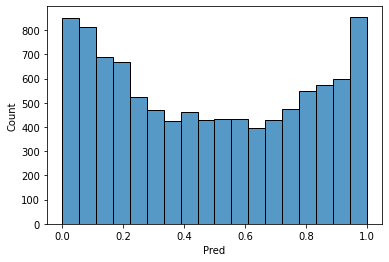

In [119]:
_ = sns.histplot()

In [123]:
sub[sub['Pred'] == sub['Pred'].max()]

,ID,Pred
674,2015_3163_3366,0.999265


In [130]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10080 non-null  object 
 1   Pred    10080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 236.2+ KB


In [132]:
sub2 = sub[sub['ID'].str.contains('2015')]

In [133]:
sub2

,ID,Pred
0,2015_3106_3107,0.199036
1,2015_3106_3110,0.444855
2,2015_3106_3113,0.040559
3,2015_3106_3114,0.189242
4,2015_3106_3116,0.169350
...,...,...
2011,2015_3443_3453,0.334783
2012,2015_3443_3455,0.577642
2013,2015_3449_3453,0.653776
2014,2015_3449_3455,0.836839


In [134]:
sub2.to_csv('kc_NCAAW_submission.csv', index=False)